In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/stroke.csv")

df = df.rename(columns={"id":"ID","gender":"GENDER", "age" : "AGE", "hypertension" : "HYPERTENSION", "heart_disease":"HEART_D", "ever_married":"MARRIED", "work_type":"WORK"
                        ,"Residence_type":"RESIDENCE", "avg_glucose_level":"GLUCOSE_LV","bmi" : "BMI", "smoking_status":"SMOKING", "stroke":"STROKE"})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5110 non-null   int64  
 1   GENDER        5110 non-null   object 
 2   AGE           5110 non-null   float64
 3   HYPERTENSION  5110 non-null   int64  
 4   HEART_D       5110 non-null   int64  
 5   MARRIED       5110 non-null   object 
 6   WORK          5110 non-null   object 
 7   RESIDENCE     5110 non-null   object 
 8   GLUCOSE_LV    5110 non-null   float64
 9   BMI           4909 non-null   float64
 10  SMOKING       5110 non-null   object 
 11  STROKE        5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [19]:
df_fill=df.fillna(0) #Fill NaN values on BMI
df_fill.info()

df_fill.loc[df_fill['GENDER'] == 'Other']
df_fill.loc[df_fill["GENDER"] == "Other", "GENDER"] = "Male" # Replace value Other to Male on Column Gender
print("")
print("Cek Value Other")
df_fill.loc[df_fill['GENDER'] == 'Other']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5110 non-null   int64  
 1   GENDER        5110 non-null   object 
 2   AGE           5110 non-null   float64
 3   HYPERTENSION  5110 non-null   int64  
 4   HEART_D       5110 non-null   int64  
 5   MARRIED       5110 non-null   object 
 6   WORK          5110 non-null   object 
 7   RESIDENCE     5110 non-null   object 
 8   GLUCOSE_LV    5110 non-null   float64
 9   BMI           5110 non-null   float64
 10  SMOKING       5110 non-null   object 
 11  STROKE        5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Cek Value Other


,ID,GENDER,AGE,HYPERTENSION,HEART_D,MARRIED,WORK,RESIDENCE,GLUCOSE_LV,BMI,SMOKING,STROKE


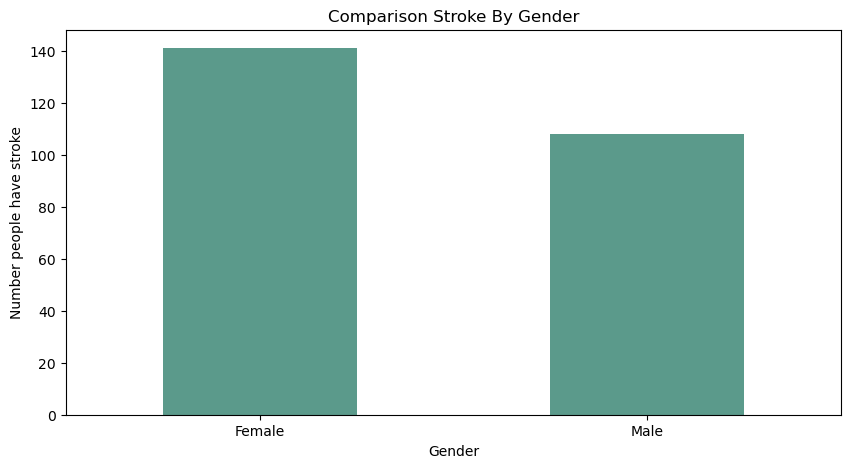

In [203]:
df_gender = df_fill[["GENDER", "STROKE"]]
df_gender_index = df_gender.set_index("GENDER")

df_gender_index.groupby("GENDER").sum("STROKE").plot(kind="bar", figsize=(10,5), color='#5B9A8B', rot=0, legend=False)

plt.title ("Comparison Stroke By Gender")
plt.xlabel('Gender')
plt.ylabel('Number people have stroke')
plt.show()
# Kasus Penderita Stroke dengan jenis kelamin perempuan lebih banyak dibandingkan dengan jenis kelamin laki - laki


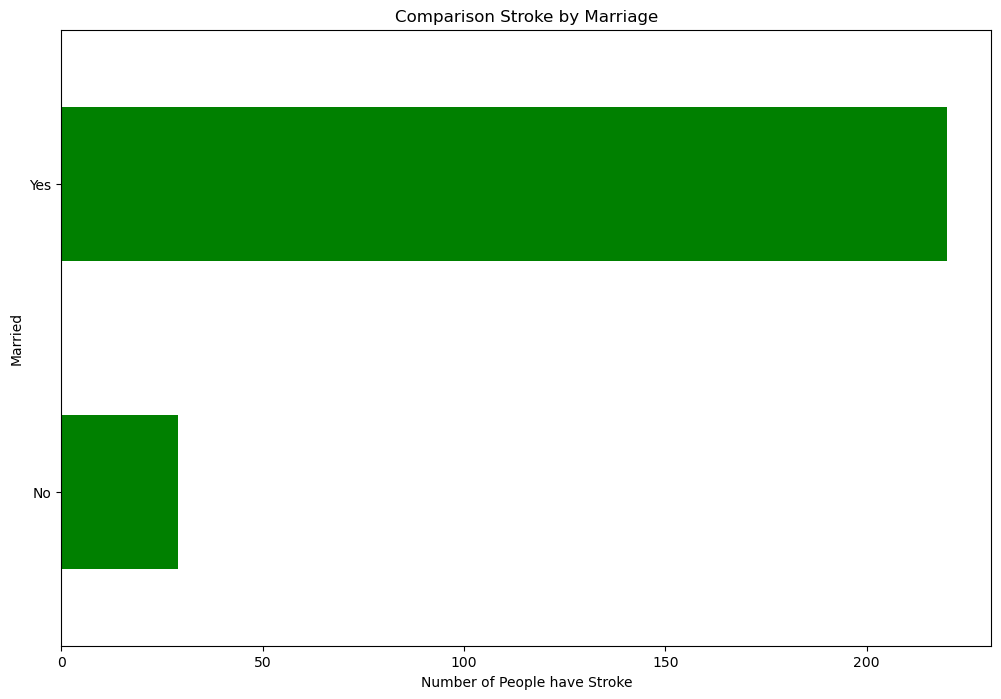

In [176]:
df_married_index = df_fill[['MARRIED','STROKE']]
df_married_index.groupby('MARRIED').sum().plot(kind='barh', color='green', legend = False, figsize = (12,8))
plt.title("Comparison Stroke by Marriage")
plt.xlabel('Number of People have Stroke')
plt.ylabel('Married')
plt.show()
# Kasus penyakit stroke didominasi oleh pasien yang telah menikah

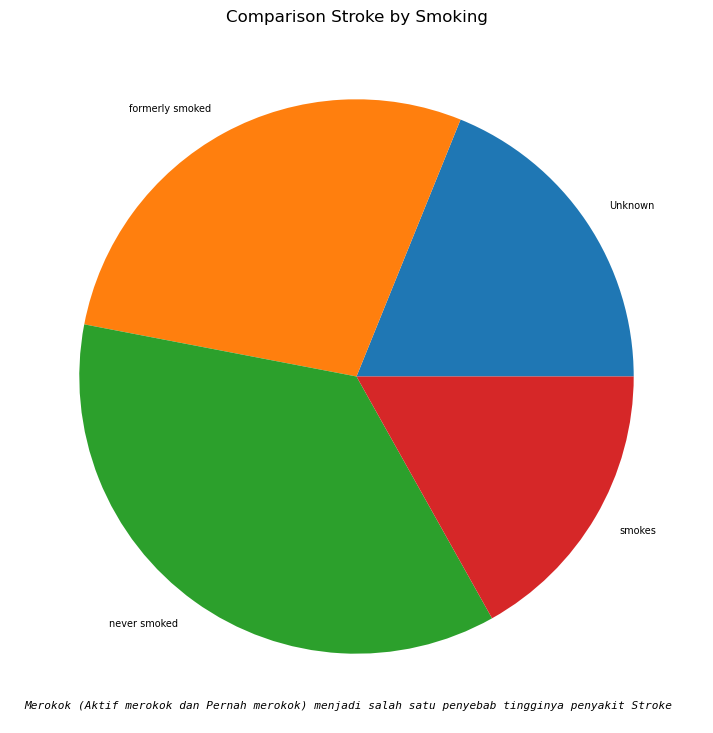

In [177]:
df_pie = df_fill
df_pie.drop('ID', axis = 1)

df_pie = df_pie[['SMOKING','STROKE']].groupby('SMOKING').sum('STROKE')
df_pie.plot.pie(y='STROKE', figsize = (9,9), fontsize= 7, legend = False)
plt.title("Comparison Stroke by Smoking")
teks = ('Merokok (Aktif merokok dan Pernah merokok) menjadi salah satu penyebab tingginya penyakit Stroke')
plt.text(-1.2, -1.2, teks, fontsize = 8, family = 'monospace', style = 'italic', ha='left', rotation=0, wrap=True)
plt.ylabel('')
plt.show()

In [21]:
df_fill

,ID,GENDER,AGE,HYPERTENSION,HEART_D,MARRIED,WORK,RESIDENCE,GLUCOSE_LV,BMI,SMOKING,STROKE
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,0.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [57]:
df_scat = df_fill.loc[(df_fill['STROKE'] == 1) & (df_fill['BMI'] != 0)] #ambil data BMI <> 0 dan STROKE = 1

df_scat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            209 non-null    int64  
 1   GENDER        209 non-null    object 
 2   AGE           209 non-null    float64
 3   HYPERTENSION  209 non-null    int64  
 4   HEART_D       209 non-null    int64  
 5   MARRIED       209 non-null    object 
 6   WORK          209 non-null    object 
 7   RESIDENCE     209 non-null    object 
 8   GLUCOSE_LV    209 non-null    float64
 9   BMI           209 non-null    float64
 10  SMOKING       209 non-null    object 
 11  STROKE        209 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 21.2+ KB


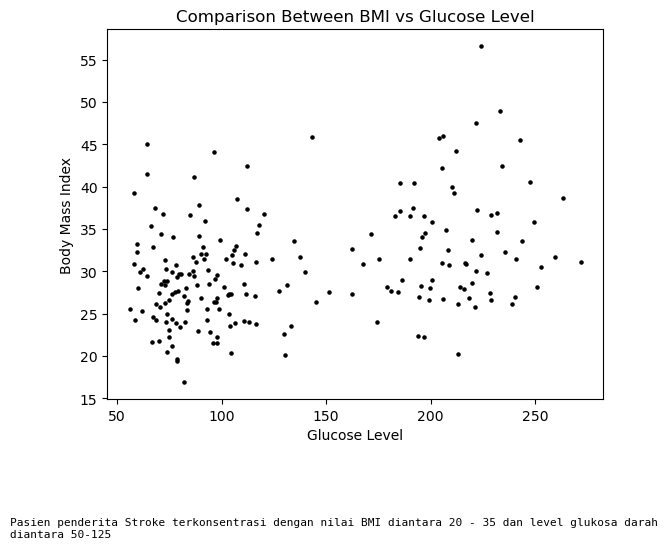

In [178]:
df_scat.plot(kind='scatter', x='GLUCOSE_LV', y='BMI', color ='black', s=5)
plt.title('Comparison Between BMI vs Glucose Level')
teks = ('Pasien penderita Stroke terkonsentrasi dengan nilai BMI diantara 20 - 35 dan level glukosa darah diantara 50-125')
plt.text(-1.2, -1.2, teks, fontsize = 8, family = 'monospace', ha='left', rotation=0, wrap=True)
plt.xlabel('Glucose Level')
plt.ylabel('Body Mass Index')
plt.show()

[]

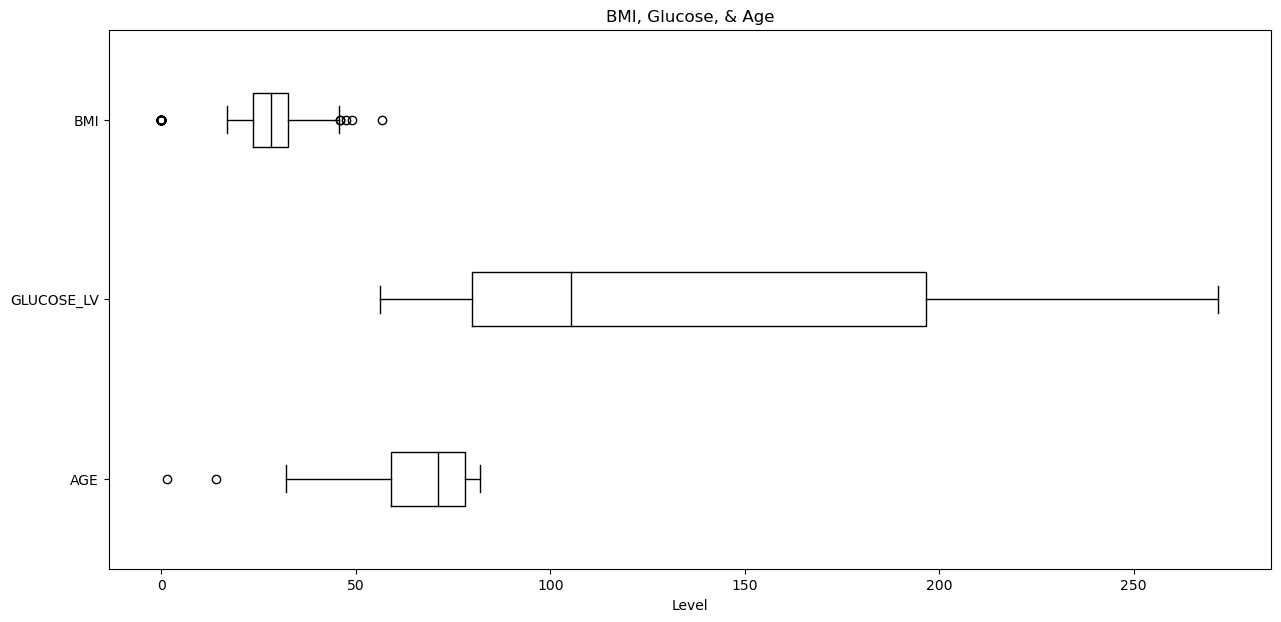

In [180]:
df_stroke = df_fill.loc[df_fill['STROKE'] == 1] #ambil penderita stroke

df_stroke.drop(["ID", "STROKE", "HEART_D", "HYPERTENSION"],axis = 1, ).plot(kind="box", vert=False, figsize = (15,7), color ='black')
plt.title('BMI, Glucose, & Age')
plt.xlabel('Level')
plt.plot()
#Tanpa kolom ID, Stroke, Heart_Disease, dan Hypertension

[]

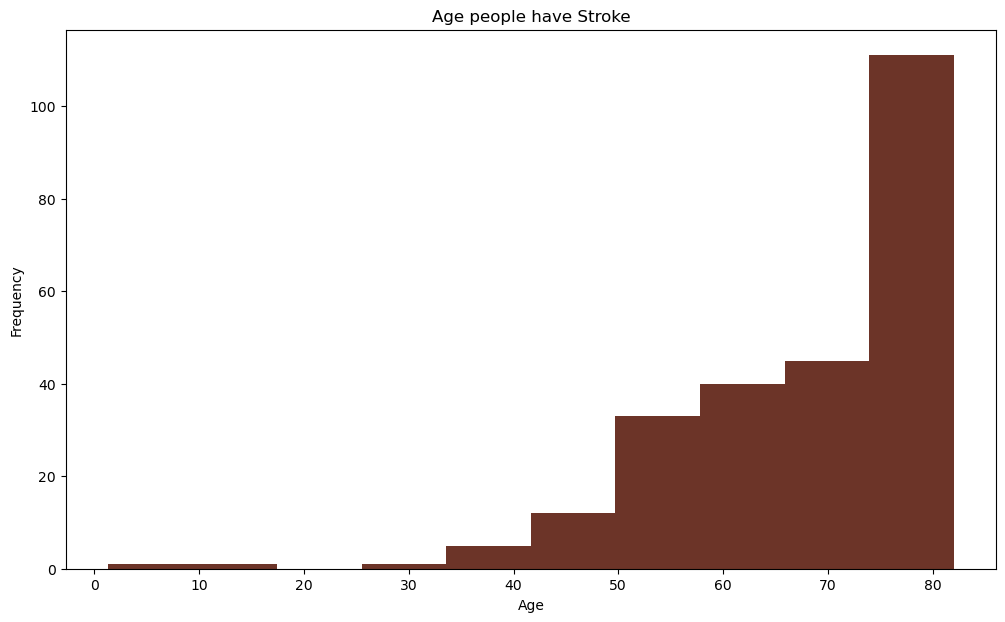

In [182]:
df_age = df_fill.loc[df_fill['STROKE'] == 1]
df_age = df_age[["GENDER", "AGE"]]

df_age.set_index("GENDER").plot(kind='hist', color='#6C3428', figsize =(12,7), legend = False)
plt.xlabel('Age')
plt.title('Age people have Stroke')
plt.plot()

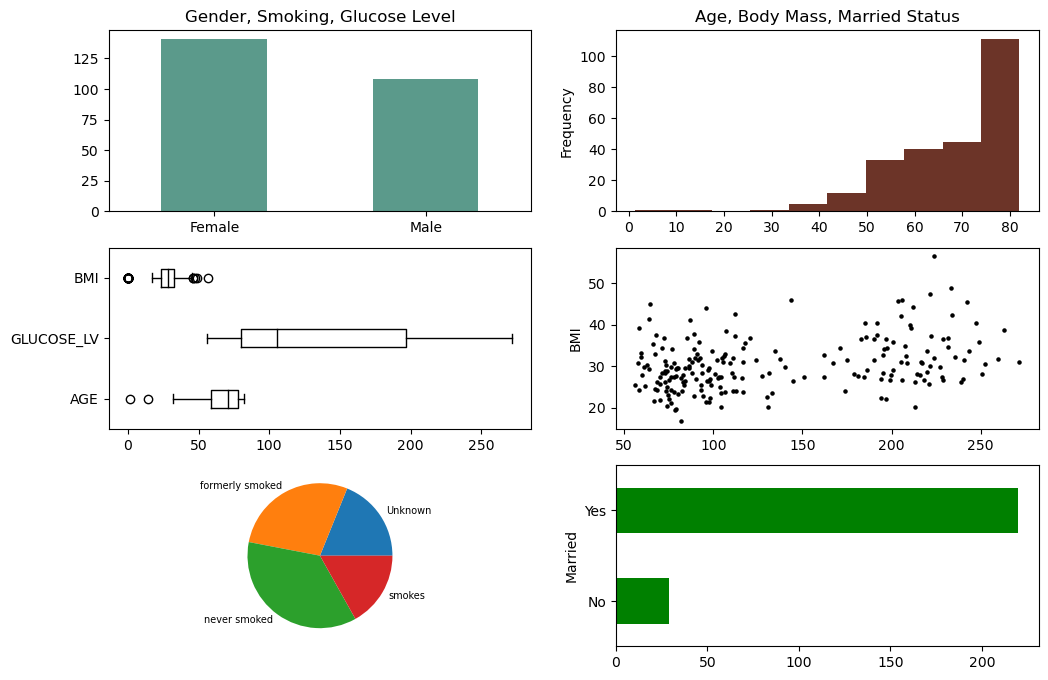

In [227]:
fig = plt.figure(figsize=(35,20))

# tambahkan plot2nya, misalkan ada 6 chart, 2 kolom, 3 baris
ax0 = fig.add_subplot(3,2,1)
ax1 = fig.add_subplot(3,2,2)
ax2 = fig.add_subplot(3,2,3)
ax3 = fig.add_subplot(3,2,4)
ax4 = fig.add_subplot(3,2,5)
ax5 = fig.add_subplot(3,2,6)

df_gender_index.groupby("GENDER").sum("STROKE").plot(kind="bar", figsize=(10,5), color='#5B9A8B', rot =0, legend=False, ax=ax0)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.set_title("Gender, Smoking, Glucose Level")

df_age.set_index("GENDER").plot(kind='hist', color='#6C3428', figsize =(12,7), legend = False, ax=ax1)
ax1.set_xlabel('')
ax1.set_title('Age, Body Mass, Married Status')

df_stroke.drop(["ID", "STROKE", "HEART_D", "HYPERTENSION"],axis = 1, ).plot(kind="box", vert=False, figsize = (15,7), color ='black', ax=ax2)
ax2.set_xlabel('')
#ax2.set_title('BMI, Glucose, & Age')

df_scat.plot(kind='scatter', x='GLUCOSE_LV', y='BMI', color ='black', s=5, ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('BMI')

df_pie.plot.pie(y='STROKE', figsize = (9,9), fontsize= 7, legend = False, ax=ax4)
ax4.set_xlabel('')
ax4.set_ylabel('')

df_married_index.groupby('MARRIED').sum().plot(kind='barh', color='green', legend = False, figsize = (12,8), ax=ax5)
ax5.set_xlabel('')
ax5.set_ylabel('Married')

plt.show()